!/usr/bin/env python
coding: utf-8

C

# 1.1) Problem Statement

Accurate long-term forecasts of temperature and precipitation are an essential tool for helping people and communities prepare for and adapt to extreme weather events.

Currently, purely physics-based models dominate short-term weather forecasting. But these models have a limited forecast horizon. The availability of meteorological data offers an opportunity for data scientists to improve sub-seasonal forecasts by blending physics-based forecasts with machine learning.

Sub-seasonal forecasts for weather and climate conditions (lead-times ranging from 15 to more than 45 days) would help communities and industries adapt to the challenges brought on by climate change.

In this project,focus on longer-term weather forecasting to help communities adapt to extreme weather events caused by climate change by generating forecasts of temperature and precipitation for one year.

# 1.2) Objectives
## a) Main objective
The objective of this project is to develop a predictive model that will forecast sub-seasonal temperatures (temperatures over a two-week period) within the United States.

## b) Specific objectives

1. To create a machine learning model that will make the predictions.

2. The model should can provide an indication of how the average temperatures in the next 14 days


# 1.3)Specifying the question


Predict the arithmetic mean of the maximum and minimum temperature over the next 14 days, for each location and start date

# 1.4) Defining the metric of success

1. Perform Exploratory Data Analysis on [Adapting to Climate Change Data](https://www.kaggle.com/competitions/widsdatathon2023/data).


2. Project will be considered successful if we train a machine learning model that will be able to predict Predict the arithmetic mean of the maximum and minimum temperature over the next 14 days, for each location


3. Use Root Mean Squared Error as the evaluation metric.

# 1.5) Data Relevance and Validation

The data available is relevant for the intended analysis . More information can be found here:

[Kaggle.](https://www.kaggle.com/competitions/widsdatathon2023/overview) 



# 1.6) Understanding the Context

The data set we are to work with contains the following columns:


# 1.7) The Experimental Design Taken

 Below are the steps taken in this analysis
 
 1. loading the required libraries
 2. Loading and previewing data
 3. Cleaning the data
 4. Feature engineering
 5. Univariate analysis
 6. Bivariate analysis
 7. Multivriate analysis
 8. Implementing the solution by training a model that will give accurate predictions
 9. Challenging the solution and giving insights on how improvements can be made.






# 2) Reading the data

In [68]:

# dataframe and plotting
import pandas as pd #used to analyze data
import numpy as np #used for working with arrays
import seaborn as sns #helps you explore and understand your data using stattistical graphs, it is built on matplotlib
import plotly as px
import matplotlib #used for creating interactive visualizations 
from matplotlib import pyplot as plt #API for matplotlib and is used for graphic visualizations
import plotly as px
from plotly.subplots import make_subplots

In [2]:
# Loading train the data into a pandas dataframe
train = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\train_data.csv')

In [3]:
# get_ipython().system('pip install sweetviz')

In [4]:
# Loading train the data into a pandas dataframe
train = pd.read_csv(r'C:\Users\USER\Desktop\PROJECTS\train_data.csv')

In [5]:
# Loading test the data into a pandas dataframe
test = pd.read_csv(r'C:\Users\USER\Desktop\MIRIAM\WIDS 2023\test_data.csv')

In [7]:
ss = pd.read_csv(r'C:\Users\USER\Desktop\MIRIAM\WIDS 2023\sample_solution.csv')




# # 3) Understanding the data

In [8]:
ss.head()

,contest-tmp2m-14d__tmp2m,index
0,27.073876,375734
1,25.109308,375735
2,22.557390,375736
3,25.572875,375737
4,20.781073,375738


In [9]:
train.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,...,-10.72,-34.16,6.99,32.16,5.01,48.53,19.21,-33.16,15.11,4.82
3,3,0.0,0.833333,9/4/14,225.28,29.02,31.64,29.57,30.73,29.71,...,0.33,-31.04,6.17,39.66,-1.41,50.59,8.29,-37.22,18.24,9.74
4,4,0.0,0.833333,9/5/14,237.24,29.02,31.64,29.57,30.73,29.71,...,9.83,-31.80,7.47,38.62,-5.21,54.73,-2.58,-42.30,21.91,10.95


In [10]:
train.tail()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
375729,375729,1.0,0.866667,8/27/16,312.05,23.13,27.2,20.25,24.43,18.35,...,-15.64,-75.68,-3.09,6.93,-16.69,16.98,-13.85,50.25,-31.33,0.77
375730,375730,1.0,0.866667,8/28/16,305.82,23.13,27.2,20.25,24.43,18.35,...,-7.59,-76.42,-13.55,13.36,-15.96,20.45,-16.36,51.65,-30.73,10.10
375731,375731,1.0,0.866667,8/29/16,311.62,23.13,27.2,20.25,24.43,18.35,...,-6.25,-70.65,-23.93,22.62,-16.71,20.28,-15.48,48.58,-18.74,9.28
375732,375732,1.0,0.866667,8/30/16,304.54,23.13,27.2,20.25,24.43,18.35,...,-7.16,-57.67,-33.55,32.06,-16.07,16.60,-20.61,39.23,-16.26,-0.22
375733,375733,1.0,0.866667,8/31/16,295.29,23.13,27.2,20.25,24.43,18.35,...,-12.36,-44.67,-32.46,36.25,-12.72,15.98,-22.56,32.53,-21.89,-1.20


In [11]:
train.shape

(375734, 246)

In [12]:
test.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,375734,0.0,0.833333,11/1/22,339.88,30.88,30.92,29.17,31.02,29.47,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
1,375735,0.0,0.833333,11/2/22,334.63,30.88,30.92,29.17,31.02,29.47,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16
2,375736,0.0,0.833333,11/3/22,337.83,30.88,30.92,29.17,31.02,29.47,...,-13.73,-44.22,-27.67,49.76,-1.31,21.44,-19.06,26.85,-16.78,13.42
3,375737,0.0,0.833333,11/4/22,345.81,30.88,30.92,29.17,31.02,29.47,...,-7.97,-49.47,-19.32,52.62,-0.44,21.65,-23.12,23.70,-18.62,10.69
4,375738,0.0,0.833333,11/5/22,357.39,30.88,30.92,29.17,31.02,29.47,...,-0.80,-56.07,-9.89,51.23,-7.57,19.86,-30.56,20.66,-25.08,19.64


In [49]:
#Type column to be used to split train and test set from the combined dataframe
train['type'] = '0'
test['type'] = '1'

# setting the maximum number of columns that will be displayed
pd.set_option('display.max_columns', 246)

# Combine train and test set
combined_df = pd.concat((train, test)).reset_index(drop =True)
combined_df

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,...,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-

In [14]:
train.columns

Index(['index', 'lat', 'lon', 'startdate',
       'contest-pevpr-sfc-gauss-14d__pevpr', 'nmme0-tmp2m-34w__cancm30',
       'nmme0-tmp2m-34w__cancm40', 'nmme0-tmp2m-34w__ccsm30',
       'nmme0-tmp2m-34w__ccsm40', 'nmme0-tmp2m-34w__cfsv20',
       ...
       'wind-vwnd-925-2010-12', 'wind-vwnd-925-2010-13',
       'wind-vwnd-925-2010-14', 'wind-vwnd-925-2010-15',
       'wind-vwnd-925-2010-16', 'wind-vwnd-925-2010-17',
       'wind-vwnd-925-2010-18', 'wind-vwnd-925-2010-19',
       'wind-vwnd-925-2010-20', 'type'],
      dtype='object', length=247)

In [15]:
#Checking the number of entries in train and test sets:

print("The combined dataset contains {} rows, and {} columns".format(combined_df.shape[0], combined_df.shape[1]))

The combined dataset contains 407088 rows, and 247 columns


In [16]:
combined_df.columns.tolist()

['index',
 'lat',
 'lon',
 'startdate',
 'contest-pevpr-sfc-gauss-14d__pevpr',
 'nmme0-tmp2m-34w__cancm30',
 'nmme0-tmp2m-34w__cancm40',
 'nmme0-tmp2m-34w__ccsm30',
 'nmme0-tmp2m-34w__ccsm40',
 'nmme0-tmp2m-34w__cfsv20',
 'nmme0-tmp2m-34w__gfdlflora0',
 'nmme0-tmp2m-34w__gfdlflorb0',
 'nmme0-tmp2m-34w__gfdl0',
 'nmme0-tmp2m-34w__nasa0',
 'nmme0-tmp2m-34w__nmme0mean',
 'contest-wind-h10-14d__wind-hgt-10',
 'nmme-tmp2m-56w__cancm3',
 'nmme-tmp2m-56w__cancm4',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-tmp2m-56w__ccsm4',
 'nmme-tmp2m-56w__cfsv2',
 'nmme-tmp2m-56w__gfdl',
 'nmme-tmp2m-56w__gfdlflora',
 'nmme-tmp2m-56w__gfdlflorb',
 'nmme-tmp2m-56w__nasa',
 'nmme-tmp2m-56w__nmmemean',
 'contest-rhum-sig995-14d__rhum',
 'nmme-prate-34w__cancm3',
 'nmme-prate-34w__cancm4',
 'nmme-prate-34w__ccsm3',
 'nmme-prate-34w__ccsm4',
 'nmme-prate-34w__cfsv2',
 'nmme-prate-34w__gfdl',
 'nmme-prate-34w__gfdlflora',
 'nmme-prate-34w__gfdlflorb',
 'nmme-prate-34w__nasa',
 'nmme-prate-34w__nmmemean',
 'contest-wind-h

In [17]:
# checking for missing values
pd.set_option('display.max_rows', 247)

test.isnull().sum()

index                                       0
lat                                         0
lon                                         0
startdate                                   0
contest-pevpr-sfc-gauss-14d__pevpr          0
nmme0-tmp2m-34w__cancm30                    0
nmme0-tmp2m-34w__cancm40                    0
nmme0-tmp2m-34w__ccsm30                     0
nmme0-tmp2m-34w__ccsm40                     0
nmme0-tmp2m-34w__cfsv20                     0
nmme0-tmp2m-34w__gfdlflora0                 0
nmme0-tmp2m-34w__gfdlflorb0                 0
nmme0-tmp2m-34w__gfdl0                      0
nmme0-tmp2m-34w__nasa0                      0
nmme0-tmp2m-34w__nmme0mean                  0
contest-wind-h10-14d__wind-hgt-10           0
nmme-tmp2m-56w__cancm3                      0
nmme-tmp2m-56w__cancm4                      0
nmme-tmp2m-56w__ccsm3                       0
nmme-tmp2m-56w__ccsm4                       0
nmme-tmp2m-56w__cfsv2                       0
nmme-tmp2m-56w__gfdl              

In [18]:
#check for duplicate rows
sum(combined_df.duplicated())

0

In [19]:
#Checking the number of records in our train dataset
combined_df.count()

index                                       407088
lat                                         407088
lon                                         407088
startdate                                   407088
contest-pevpr-sfc-gauss-14d__pevpr          407088
nmme0-tmp2m-34w__cancm30                    407088
nmme0-tmp2m-34w__cancm40                    407088
nmme0-tmp2m-34w__ccsm30                     391154
nmme0-tmp2m-34w__ccsm40                     407088
nmme0-tmp2m-34w__cfsv20                     407088
nmme0-tmp2m-34w__gfdlflora0                 407088
nmme0-tmp2m-34w__gfdlflorb0                 407088
nmme0-tmp2m-34w__gfdl0                      407088
nmme0-tmp2m-34w__nasa0                      407088
nmme0-tmp2m-34w__nmme0mean                  407088
contest-wind-h10-14d__wind-hgt-10           407088
nmme-tmp2m-56w__cancm3                      407088
nmme-tmp2m-56w__cancm4                      407088
nmme-tmp2m-56w__ccsm3                       396808
nmme-tmp2m-56w__ccsm4          

In [20]:
combined_df.dtypes

index                                         int64
lat                                         float64
lon                                         float64
startdate                                    object
contest-pevpr-sfc-gauss-14d__pevpr          float64
nmme0-tmp2m-34w__cancm30                    float64
nmme0-tmp2m-34w__cancm40                    float64
nmme0-tmp2m-34w__ccsm30                     float64
nmme0-tmp2m-34w__ccsm40                     float64
nmme0-tmp2m-34w__cfsv20                     float64
nmme0-tmp2m-34w__gfdlflora0                 float64
nmme0-tmp2m-34w__gfdlflorb0                 float64
nmme0-tmp2m-34w__gfdl0                      float64
nmme0-tmp2m-34w__nasa0                      float64
nmme0-tmp2m-34w__nmme0mean                  float64
contest-wind-h10-14d__wind-hgt-10           float64
nmme-tmp2m-56w__cancm3                      float64
nmme-tmp2m-56w__cancm4                      float64
nmme-tmp2m-56w__ccsm3                       float64
nmme-tmp2m-5

In [21]:
#Checking for the value counts for regions column
combined_df['climateregions__climateregion'].value_counts()




BSk    151272
Dfb     57024
Cfa     56232
Csb     44352
Dfa     24552
BWk     15048
Dfc     13464
BWh     10296
Csa     10296
Dsb      8712
BSh      5544
Cfb      4752
Dsc      3168
Dwa      1584
Dwb       792
Name: climateregions__climateregion, dtype: int64

# 4)Tidying the Dataset

In [22]:
# checking for missing values 
combined_df.isnull().sum()

index                                           0
lat                                             0
lon                                             0
startdate                                       0
contest-pevpr-sfc-gauss-14d__pevpr              0
nmme0-tmp2m-34w__cancm30                        0
nmme0-tmp2m-34w__cancm40                        0
nmme0-tmp2m-34w__ccsm30                     15934
nmme0-tmp2m-34w__ccsm40                         0
nmme0-tmp2m-34w__cfsv20                         0
nmme0-tmp2m-34w__gfdlflora0                     0
nmme0-tmp2m-34w__gfdlflorb0                     0
nmme0-tmp2m-34w__gfdl0                          0
nmme0-tmp2m-34w__nasa0                          0
nmme0-tmp2m-34w__nmme0mean                      0
contest-wind-h10-14d__wind-hgt-10               0
nmme-tmp2m-56w__cancm3                          0
nmme-tmp2m-56w__cancm4                          0
nmme-tmp2m-56w__ccsm3                       10280
nmme-tmp2m-56w__ccsm4                           0


In [23]:
# the dataset has missing values in nmme0-tmp2m-34w__ccsm30,nmme-tmp2m-56w__ccsm3,nmme-prate-34w__ccsm3,
# nmme0-prate-56w__ccsm30,nmme0-prate-34w__ccsm30,nmme-prate-56w__ccsm3,nmme-tmp2m-34w__ccsm3,
# ccsm30, and contest-tmp2m-14d__tmp2m which is the atrget variable.
# we are going to drop the missing values since the proportion of missing values is small compared to the
#  total size of the dataset


combined_df.dropna( inplace = True,axis=0)

In [24]:
pd.set_option('display.max_rows', 247)

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 352604 entries, 0 to 375733
Columns: 247 entries, index to type
dtypes: float64(243), int64(1), object(3)
memory usage: 667.2+ MB


observation : The DataFrame has a total of 121 columns, with 113 columns having data type float64, 7 columns with data type int64, and 1 column with data type object

In [25]:
# Convert the 'startdate' column to datetime format
combined_df['startdate'] = pd.to_datetime(combined_df['startdate'])

In [26]:
# Convert the train 'startdate' column to datetime format
train['startdate'] = pd.to_datetime(train['startdate'])

In [27]:
# Convert the 'startdate' column to datetime format
test['startdate'] = pd.to_datetime(test['startdate'])

In [28]:
# checking what period the data runs
print(combined_df['startdate']. min())
print(combined_df['startdate']. max())

2014-09-01 00:00:00
2016-08-31 00:00:00


In [29]:
print('Starting date of the whole data: ', combined_df.startdate.min())
print('Ending date of the whole data: ', combined_df.startdate.max())
print('Total number of days in available in whole data: ', combined_df.startdate.nunique())


Starting date of the whole data:  2014-09-01 00:00:00
Ending date of the whole data:  2016-08-31 00:00:00
Total number of days in available in whole data:  686


In [30]:
print('Starting date of the data: ', train.startdate.min())
print('Ending date of the data: ', train.startdate.max())
print('Total number of days in available train data: ', train.startdate.nunique())


Starting date of the data:  2014-09-01 00:00:00
Ending date of the data:  2016-08-31 00:00:00
Total number of days in available train data:  731


In [31]:
print('Starting date of the data: ', test.startdate.min())
print('Ending date of the data: ', test.startdate.max())
print('Total number of days in available train data: ', test.startdate.nunique())


Starting date of the data:  2022-11-01 00:00:00
Ending date of the data:  2022-12-31 00:00:00
Total number of days in available train data:  61


In [32]:
print(test['startdate'])

0       2022-11-01
1       2022-11-02
2       2022-11-03
3       2022-11-04
4       2022-11-05
           ...    
31349   2022-12-27
31350   2022-12-28
31351   2022-12-29
31352   2022-12-30
31353   2022-12-31
Name: startdate, Length: 31354, dtype: datetime64[ns]


In [33]:
# confirming the data type
dtype = combined_df['startdate'].dtype
print(dtype)

datetime64[ns]


Feature Engineering

In [34]:
# Extract year, month and day as additional features
# Extract year, month and day as additional features
combined_df['year'] = pd.DatetimeIndex(combined_df['startdate']).year
combined_df['month'] = pd.DatetimeIndex(combined_df['startdate']).month
combined_df['day_of_month'] = pd.DatetimeIndex(combined_df['startdate']).day
combined_df['day_of_week'] = pd.DatetimeIndex(combined_df['startdate']).dayofweek
combined_df['day_of_year'] = pd.DatetimeIndex(combined_df['startdate']).dayofyear
# ['week_of_year'] = pd.DatetimeIndex(combined_df['startdate']).weekofyear  
       

In [35]:
combined_df.drop(['startdate'], inplace = True, axis = 1)

In [46]:
# a function to get all columns of object type
obj_list = combined_df.select_dtypes(include = "object").columns
print (obj_list)

Index(['climateregions__climateregion'], dtype='object')


In [57]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in obj_list:
    combined_df[feat] = le.fit_transform(combined_df[feat])

print (combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407088 entries, 0 to 407087
Columns: 247 entries, index to type
dtypes: datetime64[ns](1), float64(243), int32(1), int64(1), object(1)
memory usage: 765.6+ MB
None


# 5)Implementing the Solution with all Features

In [59]:
# Separate train and test data from the combined dataframe
train_df = combined_df[combined_df['type'] == '0']
test_df = combined_df[combined_df['type'] == '1']

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((375734, 247), (31354, 247))

In [60]:
#drop type column  from train as it doesnt have any use now
train_df.drop(['type','startdate'], axis = 1, inplace = True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375734 entries, 0 to 375733
Columns: 245 entries, index to wind-vwnd-925-2010-20
dtypes: float64(243), int32(1), int64(1)
memory usage: 703.8 MB


C:\Users\USER\AppData\Local\Temp\ipykernel_3212\675238096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['type','startdate'], axis = 1, inplace = True)


In [61]:
#drop target and type column from test
test_df.drop(['contest-tmp2m-14d__tmp2m','type','startdate'], axis = 1, inplace= True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 375734 to 407087
Columns: 244 entries, index to wind-vwnd-925-2010-20
dtypes: float64(242), int32(1), int64(1)
memory usage: 58.5 MB


C:\Users\USER\AppData\Local\Temp\ipykernel_3212\2187715397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['contest-tmp2m-14d__tmp2m','type','startdate'], axis = 1, inplace= True)


In [62]:
# assigning our independent variables
X = train_df.drop(['contest-tmp2m-14d__tmp2m','index'], axis = 1)
Y = train_df['contest-tmp2m-14d__tmp2m']

In [63]:
# This step entails dividing the datasets into training and test sets
# We start by importing the neccessary libray for the same

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [64]:
# Training the model
# Import XGBoost Regressor
import xgboost as xgb

from xgboost import XGBRegressor

#Create a XGBoost Regressor
reg = XGBRegressor()

# Train the model using the training sets 
reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [65]:
# Model prediction on train data
y_pred = reg.predict(X_train)

In [66]:
# Model Evaluation
from sklearn import metrics

print('R^2:',metrics.r2_score(y_train, y_pred))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.9950782886132599
Adjusted R^2: 0.9950743065798282
MAE: 0.5415526506470634
MSE: 0.4790602824848208
RMSE: 0.6921418080746321


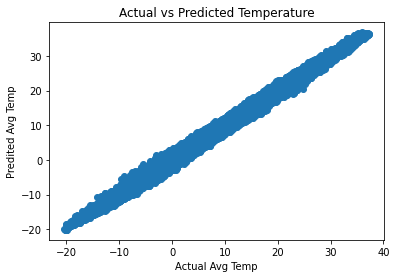

In [69]:
# Visualizing the differences between actual temp and predicted values
plt.scatter(y_train, y_pred)
plt.xlabel("Actual Avg Temp")
plt.ylabel("Predited Avg Temp")
plt.title("Actual vs Predicted Temperature")
plt.show()

# 6)Implementing the Solution with all Features,normalised data

In [70]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)

In [71]:
# Training the model with normalised data
# Import XGBoost Regressor
import xgboost as xgb

from xgboost import XGBRegressor

#Create a XGBoost Regressor
model = XGBRegressor()

# Train the model using the training sets 
model.fit(X_train_norm, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [72]:
# Model prediction on train data
y_pred_norm = model.predict(X_train_norm)

In [73]:
# Model Evaluation
from sklearn import metrics

print('R^2:',metrics.r2_score(y_train, y_pred_norm))
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_train, y_pred_norm))*(len(y_train)-1)/(len(y_train)-X_train_norm.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred_norm))
print('MSE:',metrics.mean_squared_error(y_train, y_pred_norm))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_norm)))

R^2: 0.9950782886132599
Adjusted R^2: 0.9950743065798282
MAE: 0.5415526506470634
MSE: 0.4790602824848208
RMSE: 0.6921418080746321


In [74]:
#Predicting Test data with the model
y_test_pred_norm = model.predict(X_test_norm)

In [75]:
# Model Evaluation
acc_xgb = metrics.r2_score(y_test, y_test_pred_norm)
print('R^2:', acc_xgb)
print('Adjusted R^2:',1 - (1-metrics.r2_score(y_test, y_test_pred_norm))*(len(y_test)-1)/(len(y_test)-X_test_norm.shape[1]-1))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred_norm))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred_norm))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_norm)))

R^2: 0.9945858232712449
Adjusted R^2: 0.994568258621697
MAE: 0.5673862497529721
MSE: 0.5280383457057891
RMSE: 0.7266624702747412


## 7. Optimizing the model using optuna

In [76]:
import optuna

In [77]:
# Next we’ll use Optuna to tune the hyperparameters of the XGBRegressor model. 
# Optuna lets you tune the hyperparameters of any model, not just XGBoost models.
# The first step in the process is to define an objective function. The objective function is 
# the function that Optuna will try to optimize. In our case, we’re trying to minimize the mean squared error
from sklearn.metrics import mean_squared_error

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 100),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.01, 1.0),
        'subsample': trial.suggest_float('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.01, 1.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.01, 1.0),
        'random_state': trial.suggest_int('random_state', 1,42)
    }
    model = xgb.XGBRegressor(**param)
    model.fit(X_train_norm, y_train)
    y_pred = model.predict(X_test_norm)
    return mean_squared_error(y_test, y_pred)



In [78]:
# Create the study

study = optuna.create_study(direction='minimize', study_name='regression')
study.optimize(objective, n_trials=100)

[I 2023-04-23 16:59:00,062] A new study created in memory with name: regression
[I 2023-04-23 17:03:32,805] Trial 0 finished with value: 29.657535043803396 and parameters: {'max_depth': 5, 'learning_rate': 0.01399507464540542, 'n_estimators': 77, 'min_child_weight': 3, 'gamma': 0.892914680384576, 'subsample': 0.9994863136741862, 'colsample_bytree': 0.7475218924224981, 'reg_alpha': 0.27264459278169395, 'reg_lambda': 0.058710392731578076, 'random_state': 17}. Best is trial 0 with value: 29.657535043803396.
[I 2023-04-23 17:04:58,958] Trial 1 finished with value: 1.2527358671195659 and parameters: {'max_depth': 4, 'learning_rate': 0.7769642000537166, 'n_estimators': 93, 'min_child_weight': 5, 'gamma': 0.6499506953530171, 'subsample': 0.28791576907238486, 'colsample_bytree': 0.24573296467592146, 'reg_alpha': 0.7968225508747568, 'reg_lambda': 0.9528238598677371, 'random_state': 29}. Best is trial 1 with value: 1.2527358671195659.
[I 2023-04-23 17:08:55,798] Trial 2 finished with value: 0.88

KeyboardInterrupt: 

In [79]:
# Print the best parameters
print('Best parameters', study.best_params)

Best parameters {'max_depth': 10, 'learning_rate': 0.13809967364089012, 'n_estimators': 74, 'min_child_weight': 4, 'gamma': 0.8666132191965135, 'subsample': 0.8223987983497953, 'colsample_bytree': 0.39539772272754137, 'reg_alpha': 0.9083779425700096, 'reg_lambda': 0.2527195803377127, 'random_state': 18}


In [80]:
# Print the best value
print('Best value', study.best_value)

Best value 0.20109224328731348


In [81]:
# Print the best trial
print('Best trial', study.best_trial)

Best trial FrozenTrial(number=37, state=TrialState.COMPLETE, values=[0.20109224328731348], datetime_start=datetime.datetime(2023, 4, 23, 19, 30, 2, 894176), datetime_complete=datetime.datetime(2023, 4, 23, 19, 34, 36, 643380), params={'max_depth': 10, 'learning_rate': 0.13809967364089012, 'n_estimators': 74, 'min_child_weight': 4, 'gamma': 0.8666132191965135, 'subsample': 0.8223987983497953, 'colsample_bytree': 0.39539772272754137, 'reg_alpha': 0.9083779425700096, 'reg_lambda': 0.2527195803377127, 'random_state': 18}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=1, step=1), 'learning_rate': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=100, log=False, low=50, step=1), 'min_child_weight': IntDistribution(high=10, log=False, low=1, step=1), 'gamma': FloatDistribution(high=1.0, log=False, low=0.01, step=None), 'subsample': FloatDistribution(high=1.0, log=False

In [125]:
# Now that we have the optimal hyperparameters, we can use them to train the model.
# We’ll use the XGBRegressor() function to create a model with the optimal hyperparameters
# by passing in **study.best_params.

model = xgb.XGBRegressor(**study.best_params)
model.fit(X_train_norm, y_train)
y_pred = model.predict(X_test_norm)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.20109224328731348
RMSE:  0.4484330978945616


In [97]:
# creating submission file
# test_pred = np.expm1(model.predict(test_df))

In [98]:
# test_df["contest-tmp2m-14d__tmp2m"] = test_pred
# # test_df.to_csv("results.csv", columns=['contest-tmp2m-14d__tmp2m'])

In [99]:
# import os
# os.getcwd()

# 8)Implementing the Solution with combined Features

In [84]:
# 2) Combining Features
# getting the mean of  'wind-vwnd-925-2010-1',
combined_df['avg_wind-vwnd-925-2010'] = combined_df.iloc[:,225:245].mean(axis=1)
combined_df = combined_df.drop(combined_df.iloc[:,225:246], axis = 1)
combined_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [85]:
# getting the mean of  'wind-hgt-100-2010-1',
combined_df['avg_wind-hgt-100-2010'] = combined_df.iloc[:,216:225].mean(axis=1)
combined_df = combined_df.drop(combined_df.iloc[:,216:225], axis = 1)
combined_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [86]:
# getting the mean of  'wind-hgt-10',
combined_df['avg_wind-hgt-10-2010'] = combined_df.iloc[:,206:215].mean(axis=1)
combined_df = combined_df.drop(combined_df.iloc[:,206:216], axis = 1)
combined_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [87]:
# getting the mean of  'wind-uwnd-925-2010',
combined_df['avg_wind-uwnd-925-2010'] = combined_df.iloc[:,186:205].mean(axis=1)
combined_df = combined_df.drop(combined_df.iloc[:,186:206], axis = 1)
combined_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,type,avg_wind-vwnd-925-2010,avg_wind-hgt-100-2010,avg_wind-hgt-10-2010,avg_wind-uwnd-925-2010
0,0,0.0,

In [88]:
# getting the mean of  'icec-2010',
combined_df['avg_icec-2010'] = combined_df.iloc[:,176:185].mean(axis=1)
combined_df = combined_df.drop(combined_df.iloc[:,176:186], axis = 1)
combined_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,type,avg_wind-vwnd-925-2010,avg_wind-hgt-100-2010,avg_wind-hgt-10-2010,avg_wind-uwnd-925-2010,avg_icec-2010
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31246.63,28.3,29.47,

In [89]:
# getting the mean of  wind-hgt-500-2010,
combined_df['avg_wind-hgt-500-2010'] = combined_df.iloc[:,166:175].mean(axis=1)
combined_df =combined_df.drop(combined_df.iloc[:,166:176], axis = 1)
combined_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,type,avg_wind-vwnd-925-2010,avg_wind-hgt-100-2010,avg_wind-hgt-10-2010,avg_wind-uwnd-925-2010,avg_icec-2010,avg_wind-hgt-500-2010
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31246.63,28.3,29.47,27.13,27.36,27.71,28.25,27.7,28.72,28.38,28.11,81.72,25.33,17.55,13.59,25.28,38.05,18.06,23.2,38.59,16.5,24.02,16666.81,17.41,5.89,14.37,11.6,17.63,1.17,2.6,0.32,14.88,9.54,35.64,

In [90]:
# getting the mean of sst-2010,
combined_df['avg_sst-2010'] = combined_df.iloc[:,156:165].mean(axis=1)
combined_df = combined_df.drop(combined_df.iloc[:,156:166], axis = 1)
combined_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,type,avg_wind-vwnd-925-2010,avg_wind-hgt-100-2010,avg_wind-hgt-10-2010,avg_wind-uwnd-925-2010,avg_icec-2010,avg_wind-hgt-500-2010,avg_sst-2010
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31246.63,28.3,29.47,27.13,27.36,27.71,28.25,27.7,28.72,28.38,28.11,81.72,25.33,17.55,13.59,25.28,38.05,18.06,23.2,38.59,16.5,24.02,16666.81,17.41,5.89,14.37,11.6,17.63,1.17,2.6,0.32,14.88,9.54,35.64,17.54,5.19,16.93,23.16,3.28,3.06,8.41,14.53,14.19,28.744480,101352.08,4.41,18.45,18.36,10.35,35.4,

In [91]:
# getting the mean of wind-hgt-850,
combined_df['avg_wind-hgt-850'] = combined_df.iloc[:,146:155].mean(axis=1)
combined_df = combined_df.drop(combined_df.iloc[:,146:156], axis = 1)
combined_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,type,avg_wind-vwnd-925-2010,avg_wind-hgt-100-2010,avg_wind-hgt-10-2010,avg_wind-uwnd-925-2010,avg_icec-2010,avg_wind-hgt-500-2010,avg_sst-2010,avg_wind-hgt-850
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31246.63,28.3,29.47,27.13,27.36,27.71,28.25,27.7,28.72,28.38,28.11,81.72,25.33,17.55,13.59,25.28,38.05,18.06,23.2,38.59,16.5,24.02,16666.81,17.41,5.89,14.37,11.6,17.63,1.17,2.6,0.32,14.88,9.54,35.64,17.54,5.19,16.93,23.16,3.28,3.06,8.41,14.53,14.19,28.744480,101352.08,4.41,18.45,18.36,10.35,35.4,34.54,19.54,35.99,28.31,18.89,24.43,98644.97,-2.56,27.83,29.34,27.57,27.98,27.3,28.27,28.42,28.3,28.55,28.17,42.45,-3.52,94.31,1535.52,-5.22,5899.66,30.18,32.86,28.85,30.73,29.33,31.66

In [92]:
# getting the mean of hgt wind-uwnd-250,
combined_df['avg_wind-uwnd-250'] = combined_df.iloc[:,121:140].mean(axis=1)
combined_df = combined_df.drop(combined_df.iloc[:,121:141], axis = 1)
combined_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,type,avg_wind-vwnd-925-2010,avg_wind-hgt-100-2010,avg_wind-hgt-10-2010,avg_wind-uwnd-925-2010,avg_icec-2010,avg_wind-hgt-500-2010,avg_sst-2010,avg_wind-hgt-850,avg_wind-uwnd-250
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31246.63,28.3,29.47,27.13,27.36,27.71,28.25,27.7,28.72,28.38,28.11,81.72,25.33,17.55,13.59,25.28,38.05,18.06,23.2,38.59,16.5,24.02,16666.81,17.41,5.89,14.37,11.6,17.63,1.17,2.6,0.32,14.88,9.54,35.64,17.54,5.19,16.93,23.16,3.28,3.06,8.41,14.53,14.19,28.744480,101352.08,4.41,18.45,18.36,10.35,35.4,34.54,19.54,35.99,28.31,18.89,24.43,98644.97,-2.56,27.83,29.34,27.57,27.98,27.3,28.27,28.42,28.3,28.55,28.17,42.45,-3.52,94.31,1535.52,-5.22,5899.66,30.18,32.86,28.85,30.73,29.33,31.66,31.45,31.33,29.51,30.65,0,200.0,-111.29,33.66,-129.06,20.57,-123.14,-158.00,-125.92,104.95,15.14,-99.89,7.88,5.91,-208.23,18.67,21.00,134.88,43.65,-44.70,-3.70,-65.02,4.0,1.23,0.961,56.0,4.0,0,-118.5500,-3297.756667,-9125.492222,7.345263,-0.366667,-868.132222,30.984444,-595.070000,63.010000
1,1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31244.78,28.3,29.47,27.13

In [93]:
# getting the mean of wind-vwnd-250-2010,
combined_df['avg_wind-vwnd-250-2010'] = combined_df.iloc[:,101:120].mean(axis=1)
combined_df = combined_df.drop(combined_df.iloc[:,101:121], axis = 1)
combined_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,type,avg_wind-vwnd-925-2010,avg_wind-hgt-100-2010,avg_wind-hgt-10-2010,avg_wind-uwnd-925-2010,avg_icec-2010,avg_wind-hgt-500-2010,avg_sst-2010,avg_wind-hgt-850,avg_wind-uwnd-250,avg_wind-vwnd-250-2010
0,0,0.0,0.833333,2014-09-01,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31246.63,28.3,29.47,27.13,27.36,27.71,28.25,27.7,28.72,28.38,28.11,81.72,25.33,17.55,13.59,25.28,38.05,18.06,23.2,38.59,16.5,24.02,16666.81,17.41,5.89,14.37,11.6,17.63,1.17,2.6,0.32,14.88,9.54,35.64,17.54,5.19,16.93,23.16,3.28,3.06,8.41,14.53,14.19,28.744480,101352.08,4.41,18.45,18.36,10.35,35.4,34.54,19.54,35.99,28.31,18.89,24.43,98644.97,-2.56,27.83,29.34,27.57,27.98,27.3,28.27,28.42,28.3,28.55,28.17,42.45,-3.52,94.31,1535.52,-5.22,5899.66,30.18,32.86,28.85,30.73,29.33,31.66,31.45,31.33,29.51,30.65,0,200.0,4.0,1.23,0.961,56.0,4.0,0,-118.5500,-3297.756667,-9125.492222,7.345263,-0.366667,-868.132222,30.984444,-595.070000,63.010000,-31.453684
1,1,0.0,0.833333,2014-09-02,228.90,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31244.78,28.3,29.47,27.13,27.36,27.71,28.25,27.7,28.72,28.38,28.11,82.56,25.33,17.55,13.59,25.28,38.05,18.06,23.2,38.59,16.5,24.02,16667.31,17.41,5.89,14.37,11.6,17.63,1.17,2.6,0.32,14.88,9.54,35.64,17.54,5.19,16.93,23.16,3.28,3.06,8.41,14.53,14.19,28.370585,101396.02,3.74,18.45,18.36,10.35,35.4,34.54,19.54,35.99,28.31,18.89,24.43,98686.80,-2.39,27.83,29.34,27.57,27.98,27.3,28.27,28.42,28.3,28.55,28.17,42.66,-4.49,100.85,1538.00,-5.20,5901.03,30.18,32.86,28.85,30.73,29.33,31.66,31.45,31.33,29.51,30.65,0,200.0,4.0,1.53,0.961,56.0,4.0,0,-116.5680,-3139.

In [94]:
combined_df.shape

(407088, 117)

In [102]:
pd.set_option('display.max_rows', 117)
combined_df.columns.tolist()

['index',
 'lat',
 'lon',
 'startdate',
 'contest-pevpr-sfc-gauss-14d__pevpr',
 'nmme0-tmp2m-34w__cancm30',
 'nmme0-tmp2m-34w__cancm40',
 'nmme0-tmp2m-34w__ccsm30',
 'nmme0-tmp2m-34w__ccsm40',
 'nmme0-tmp2m-34w__cfsv20',
 'nmme0-tmp2m-34w__gfdlflora0',
 'nmme0-tmp2m-34w__gfdlflorb0',
 'nmme0-tmp2m-34w__gfdl0',
 'nmme0-tmp2m-34w__nasa0',
 'nmme0-tmp2m-34w__nmme0mean',
 'contest-wind-h10-14d__wind-hgt-10',
 'nmme-tmp2m-56w__cancm3',
 'nmme-tmp2m-56w__cancm4',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-tmp2m-56w__ccsm4',
 'nmme-tmp2m-56w__cfsv2',
 'nmme-tmp2m-56w__gfdl',
 'nmme-tmp2m-56w__gfdlflora',
 'nmme-tmp2m-56w__gfdlflorb',
 'nmme-tmp2m-56w__nasa',
 'nmme-tmp2m-56w__nmmemean',
 'contest-rhum-sig995-14d__rhum',
 'nmme-prate-34w__cancm3',
 'nmme-prate-34w__cancm4',
 'nmme-prate-34w__ccsm3',
 'nmme-prate-34w__ccsm4',
 'nmme-prate-34w__cfsv2',
 'nmme-prate-34w__gfdl',
 'nmme-prate-34w__gfdlflora',
 'nmme-prate-34w__gfdlflorb',
 'nmme-prate-34w__nasa',
 'nmme-prate-34w__nmmemean',
 'contest-wind-h

In [103]:
# Convert the 'startdate' column to datetime format
combined_df['startdate'] = pd.to_datetime(combined_df['startdate'])

In [104]:
print('Starting date of the whole data: ', combined_df.startdate.min())
print('Ending date of the whole data: ', combined_df.startdate.max())
print('Total number of days in available in whole data: ', combined_df.startdate.nunique())

Starting date of the whole data:  2014-09-01 00:00:00
Ending date of the whole data:  2022-12-31 00:00:00
Total number of days in available in whole data:  792


In [105]:
print('Starting date of the data: ', train.startdate.min())
print('Ending date of the data: ', train.startdate.max())
print('Total number of days in available train data: ', train.startdate.nunique())

Starting date of the data:  2014-09-01 00:00:00
Ending date of the data:  2016-08-31 00:00:00
Total number of days in available train data:  731


In [106]:
print('Starting date of the data: ', test.startdate.min())
print('Ending date of the data: ', test.startdate.max())
print('Total number of days in available train data: ', test.startdate.nunique())

Starting date of the data:  2022-11-01 00:00:00
Ending date of the data:  2022-12-31 00:00:00
Total number of days in available train data:  61


In [107]:
# Extract year, month and day as additional features
combined_df['year'] = pd.DatetimeIndex(combined_df['startdate']).year
combined_df['month'] = pd.DatetimeIndex(combined_df['startdate']).month
combined_df['day_of_month'] = pd.DatetimeIndex(combined_df['startdate']).day
combined_df['day_of_week'] = pd.DatetimeIndex(combined_df['startdate']).dayofweek
combined_df['day_of_year'] = pd.DatetimeIndex(combined_df['startdate']).dayofyear
combined_df['week_of_year'] = pd.DatetimeIndex(combined_df['startdate']).weekofyear 

C:\Users\USER\AppData\Local\Temp\ipykernel_3212\2876075029.py:7: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  combined_df['week_of_year'] = pd.DatetimeIndex(combined_df['startdate']).weekofyear


In [108]:
combined_df.drop(['startdate'], inplace = True, axis = 1)

In [109]:
combined_df.drop(['climateregions__climateregion'], inplace = True, axis = 1)

In [169]:
# new df with only combined features

new_df = combined_df[['index','lat','lon','contest-pevpr-sfc-gauss-14d__pevpr','nmme0-tmp2m-34w__nmme0mean',
                     'contest-wind-h10-14d__wind-hgt-10','nmme-tmp2m-56w__nmmemean','contest-rhum-sig995-14d__rhum',
                     'nmme-prate-34w__nmmemean','contest-wind-h100-14d__wind-hgt-100','nmme0-prate-56w__nmme0mean',
                     'nmme0-prate-34w__nmme0mean','contest-tmp2m-14d__tmp2m','contest-slp-14d__slp',
                     'contest-wind-vwnd-925-14d__wind-vwnd-925','nmme-prate-56w__nmmemean',
                     'contest-pres-sfc-gauss-14d__pres','contest-wind-uwnd-250-14d__wind-uwnd-250','nmme-tmp2m-34w__nmmemean',
                     'contest-prwtr-eatm-14d__prwtr','contest-wind-vwnd-250-14d__wind-vwnd-250','contest-precip-14d__precip',
                     'contest-wind-h850-14d__wind-hgt-850','contest-wind-uwnd-925-14d__wind-uwnd-925',
                     'contest-wind-h500-14d__wind-hgt-500','nmme0mean','elevation__elevation', 'mjo1d__phase',
                     'mjo1d__amplitude','mei__mei','mei__meirank','mei__nip','type','avg_wind-vwnd-925-2010',
                     'avg_wind-hgt-100-2010','avg_wind-hgt-10-2010','avg_wind-uwnd-925-2010','avg_icec-2010',
                     'avg_wind-hgt-500-2010', 'avg_sst-2010','avg_wind-hgt-850','avg_wind-uwnd-250','avg_wind-vwnd-250-2010',
                     'year','month','day_of_month','day_of_week','day_of_year','week_of_year']]

In [112]:
import sweetviz as sv

# Create a sweetviz report for the dataset
report = sv.analyze(new_df)

# Display the report
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [171]:
# Separate train and test data from the combined dataframe
train_df = new_df[new_df['type'] == '0']
test_df = new_df[new_df['type'] == '1']

# Check the shapes of the split dataset
train_df.shape, test_df.shape

((375734, 49), (31354, 49))

In [172]:
#drop type column  from train as it doesnt have any use now
train_df.drop(['type'], axis = 1, inplace = True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375734 entries, 0 to 375733
Data columns (total 48 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   index                                     375734 non-null  int64  
 1   lat                                       375734 non-null  float64
 2   lon                                       375734 non-null  float64
 3   contest-pevpr-sfc-gauss-14d__pevpr        375734 non-null  float64
 4   nmme0-tmp2m-34w__nmme0mean                375734 non-null  float64
 5   contest-wind-h10-14d__wind-hgt-10         375734 non-null  float64
 6   nmme-tmp2m-56w__nmmemean                  375734 non-null  float64
 7   contest-rhum-sig995-14d__rhum             375734 non-null  float64
 8   nmme-prate-34w__nmmemean                  375734 non-null  float64
 9   contest-wind-h100-14d__wind-hgt-100       375734 non-null  float64
 10  nmme0-prate-56w__nmm

C:\Users\USER\AppData\Local\Temp\ipykernel_3212\3041364917.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(['type'], axis = 1, inplace = True)


In [173]:
#drop target and type column from test
test_df.drop(['type'], axis = 1, inplace= True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 375734 to 407087
Data columns (total 48 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   index                                     31354 non-null  int64  
 1   lat                                       31354 non-null  float64
 2   lon                                       31354 non-null  float64
 3   contest-pevpr-sfc-gauss-14d__pevpr        31354 non-null  float64
 4   nmme0-tmp2m-34w__nmme0mean                31354 non-null  float64
 5   contest-wind-h10-14d__wind-hgt-10         31354 non-null  float64
 6   nmme-tmp2m-56w__nmmemean                  31354 non-null  float64
 7   contest-rhum-sig995-14d__rhum             31354 non-null  float64
 8   nmme-prate-34w__nmmemean                  31354 non-null  float64
 9   contest-wind-h100-14d__wind-hgt-100       31354 non-null  float64
 10  nmme0-prate-56w__nmme0mean  

C:\Users\USER\AppData\Local\Temp\ipykernel_3212\2583263532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(['type'], axis = 1, inplace= True)


In [174]:
# dropping rows with missing values
# Drop rows with missing values
train_df = train_df.dropna()

In [175]:
# assigning our independent variables
features = train_df.drop(['contest-tmp2m-14d__tmp2m','index'], axis = 1)
target = train_df['contest-tmp2m-14d__tmp2m']

In [176]:
# This step entails dividing the datasets into training and test sets
# We start by importing the neccessary libray for the same

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2,random_state=42)

In [177]:
# lets print the shapes again 
print("Shape of the x Train :", X_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", X_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (300587, 46)
Shape of the y Train : (300587,)
Shape of the x Test : (75147, 46)
Shape of the y Test : (75147,)


In [122]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

# # storing training and validation data in LightGBM Datasets.
# train_data = lgb.Dataset(X_train, label = y_train)
# valid_data = lgb.Dataset(X_valid, label = y_valid)

#create a model using lgbm
model1 = LGBMRegressor()

model1.fit(X_train, y_train,
          eval_set=[(X_test, y_test)],
           eval_metric='l2',
          early_stopping_rounds=100)

c:\Program Files\Python310\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's l2: 80.3035
[2]	valid_0's l2: 66.2782
[3]	valid_0's l2: 54.9043
[4]	valid_0's l2: 45.6101
[5]	valid_0's l2: 38.0668
[6]	valid_0's l2: 31.8882
[7]	valid_0's l2: 26.8168
[8]	valid_0's l2: 22.6838
[9]	valid_0's l2: 19.3035
[10]	valid_0's l2: 16.5305
[11]	valid_0's l2: 14.224
[12]	valid_0's l2: 12.3267
[13]	valid_0's l2: 10.7499
[14]	valid_0's l2: 9.427
[15]	valid_0's l2: 8.33875
[16]	valid_0's l2: 7.42885
[17]	valid_0's l2: 6.66262
[18]	valid_0's l2: 6.01957
[19]	valid_0's l2: 5.4658
[20]	valid_0's l2: 5.00291
[21]	valid_0's l2: 4.61549
[22]	valid_0's l2: 4.28894
[23]	valid_0's l2: 4.01485
[24]	valid_0's l2: 3.77656
[25]	valid_0's l2: 3.57024
[26]	valid_0's l2: 3.38642
[27]	valid_0's l2: 3.22583
[28]	valid_0's l2: 3.08431
[29]	valid_0's l2: 2.94514
[30]	valid_0's l2: 2.82713
[31]	valid_0's l2: 2.72715
[32]	valid_0's l2: 2.64471
[33]	valid_0's l2: 2.56006
[34]	valid_0's l2: 2.47394
[35]	valid_0's l2: 2.41345
[36]	valid_0's l2: 2.35144
[37]	valid_0's l2: 2.28893
[38]	valid_0's

LGBMRegressor()

In [123]:
# make predictions
y_train_pred1 = model1.predict(X_train, num_iteration=model.best_iteration_)
y_test_pred1 = model1.predict(X_test, num_iteration=model.best_iteration_)

import lightgbm as lgb
from sklearn.metrics import mean_squared_error

# calculate the rmse
rmse = np.sqrt(mean_squared_error(y_train, y_train_pred1))
print("RMSE:", rmse)

RMSE: 0.9959937265739133


In [129]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm1 = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm1 = norm1.transform(X_train)

# transform testing data
X_test_norm1 = norm1.transform(X_test)

In [131]:
# Now that we have the optimal hyperparameters, we can use them to train the model.
# We’ll use the XGBRegressor() function to create a model with the optimal hyperparameters
# by passing in **study.best_params.

model = xgb.XGBRegressor(**study.best_params)
model.fit(X_train_norm1, y_train)
y_pred1 = model.predict(X_test_norm1)

print('MSE: ', mean_squared_error(y_test, y_pred1))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred1)))

MSE:  0.2793778932169893
RMSE:  0.5285620996789206


In [124]:
# Now that we have the optimal hyperparameters, we can use them to train the model.
# We’ll use the XGBRegressor() function to create a model with the optimal hyperparameters
# by passing in **study.best_params.

model = xgb.XGBRegressor(**study.best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('MSE: ', mean_squared_error(y_test, y_pred))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))

MSE:  0.2777372653771754
RMSE:  0.5270078418554845


# 9) Removing Redundancy

In [178]:
# a function to get all columns of object type
obj_list = new_df.select_dtypes(include = "object").columns
print (obj_list)

Index(['type'], dtype='object')


In [179]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in obj_list:
    new_df[feat] = le.fit_transform(new_df[feat])

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407088 entries, 0 to 407087
Data columns (total 49 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   index                                     407088 non-null  int64  
 1   lat                                       407088 non-null  float64
 2   lon                                       407088 non-null  float64
 3   contest-pevpr-sfc-gauss-14d__pevpr        407088 non-null  float64
 4   nmme0-tmp2m-34w__nmme0mean                407088 non-null  float64
 5   contest-wind-h10-14d__wind-hgt-10         407088 non-null  float64
 6   nmme-tmp2m-56w__nmmemean                  407088 non-null  float64
 7   contest-rhum-sig995-14d__rhum             407088 non-null  float64
 8   nmme-prate-34w__nmmemean                  407088 non-null  float64
 9   contest-wind-h100-14d__wind-hgt-100       407088 non-null  float64
 10  nmme0-prate-56w__nmm

C:\Users\USER\AppData\Local\Temp\ipykernel_3212\3969477677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[feat] = le.fit_transform(new_df[feat])


In [180]:
# we begin by drawing a correlation matrix using the .corr
# wedevelop a mask since the correlation matrix will repeat itselt along tha main diagonal
# and duplicate itself. So, we will slice it to remove the duplicate data
# first we create an array filled with ones, assign upper side 1 and lower side 0
# and a one will be applied where 1 is set

# generate a mask for the upper triangle

corr = new_df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))

<AxesSubplot:>

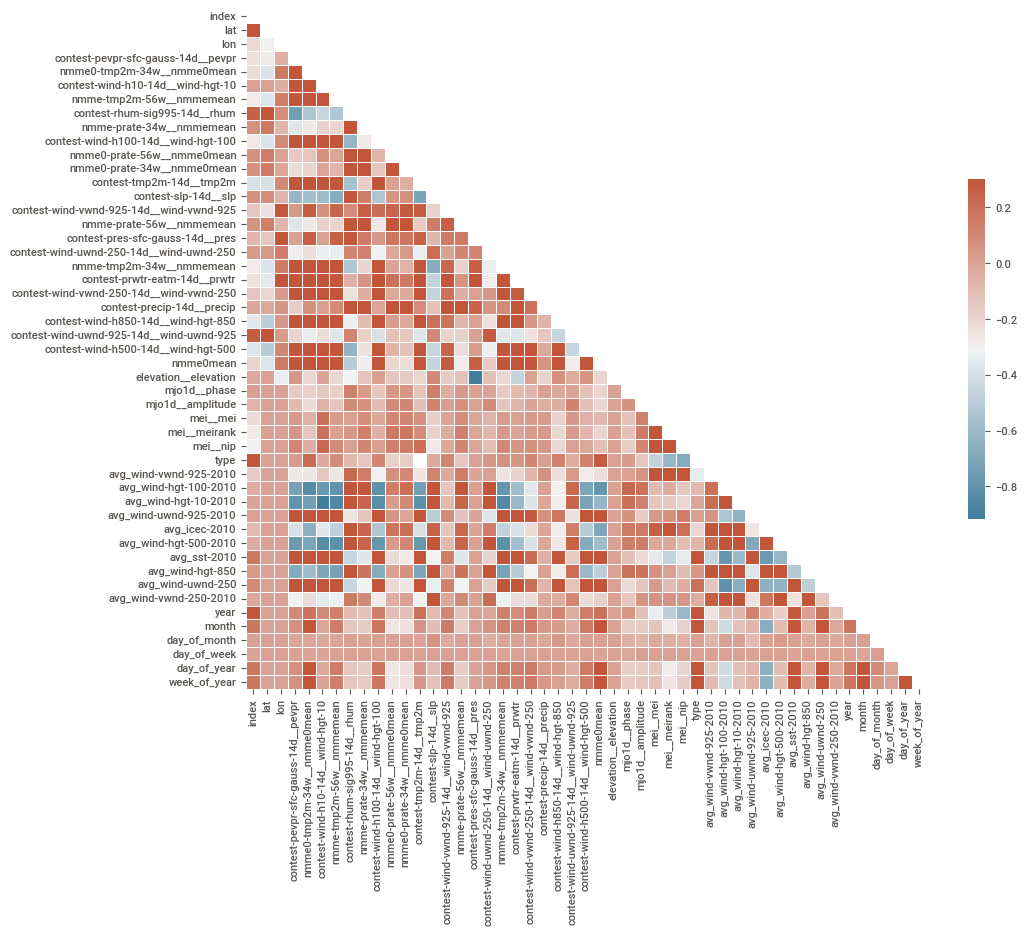

In [181]:
# set up matplotlib figure
f, ax = plt.subplots(figsize =(11,9))

# generate a custom diverging colormap to show different color tones
cmap = sns.diverging_palette(230,20, as_cmap = True)

# draw the heatmap with mask and correct aspect ratio
sns.heatmap(corr, mask = mask, cmap= cmap, vmax=0.3,
           square = True, linewidth = .5, cbar_kws = {'shrink' : .5})

In [182]:
# get correlations, it will get diagonaland lower triangular pairs of correlation matrix
def get_redundant_pairs(new_df):
    pairs_to_drop = set()
    cols = new_df.columns
    for i in range(0, new_df.shape[1]):
        for k in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[k]))
    return pairs_to_drop

In [183]:
# sort correlations in decsending order
def get_top_correlations(new_df, n =5):
    au_corr = new_df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(new_df)
    au_corr = au_corr.drop(labels = labels_to_drop).sort_values(ascending = False)
    return au_corr[0:n]

In [184]:
print('Top Absolute Correlations')
print(get_top_correlations(new_df, 50))

Top Absolute Correlations
nmme-tmp2m-56w__nmmemean             nmme-tmp2m-34w__nmmemean               0.998228
month                                day_of_year                            0.996734
nmme-prate-34w__nmmemean             nmme-prate-56w__nmmemean               0.991558
day_of_year                          week_of_year                           0.957833
month                                week_of_year                           0.957726
contest-wind-h100-14d__wind-hgt-100  contest-wind-h500-14d__wind-hgt-500    0.957421
nmme-tmp2m-56w__nmmemean             contest-tmp2m-14d__tmp2m               0.950865
contest-tmp2m-14d__tmp2m             nmme-tmp2m-34w__nmmemean               0.950187
nmme0-tmp2m-34w__nmme0mean           nmme0mean                              0.946454
type                                 year                                   0.940105
mei__mei                             mei__meirank                           0.935911
avg_wind-hgt-10-2010                 av